In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import iplot
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot

In [2]:
covid_latest_valid_mortality=pd.read_csv('covid_latest_valid_mortality.csv')
covid_latest_notnull_mortality=pd.read_csv('covid_latest_notnull_mortality.csv')
covid_countries=pd.read_csv('covid_countries.csv')

In [3]:
print(f"Total Countries: {covid_countries['location'].nunique()}")
print(f"Total countries with valid total deaths: {covid_latest_notnull_mortality['location'].nunique()}")
print(f"Total countries without NaN total deaths: {covid_latest_valid_mortality['location'].nunique()}")

Total Countries: 243
Total countries with valid total deaths: 234
Total countries without NaN total deaths: 226


In [4]:
# Calculates Total Deaths per 1 million people (DPM)
covid_countries['deaths_per_million'] = (covid_countries['total_deaths'] / covid_countries['population']) * 1_000_000

# Calculates Case Fatality Rate (CFR) 
covid_countries['case_fatality_rate'] = (covid_countries['total_deaths'] / covid_countries['total_cases']) * 100

covid_countries[['location', 'date', 'total_deaths', 'population', 'deaths_per_million','case_fatality_rate']].sample(5)

,location,date,total_deaths,population,deaths_per_million,case_fatality_rate
233862,Mongolia,2020-09-28,0.0,3398373,0.000000,0.000000
190305,Kuwait,2022-11-23,2570.0,4268886,602.030600,0.387848
288714,Portugal,2023-03-05,26277.0,10270857,2558.403841,0.472017
2389,Albania,2021-12-20,3158.0,2842318,1111.064983,1.538806
384409,United States Virgin Islands,2023-01-21,128.0,99479,1286.703726,0.532623


In [5]:
print("📈 Top 10 Countries by Deaths Per Million (Total Impact):")
covid_latest_valid_mortality[['location', 'deaths_per_million', 'population']] \
    .sort_values(by='deaths_per_million', ascending=False) \
    .head(10)

📈 Top 10 Countries by Deaths Per Million (Total Impact):


,location,deaths_per_million,population
161,Peru,6489.799524,34049588
31,Bulgaria,5706.319196,6781955
26,Bosnia and Herzegovina,5069.382378,3233530
92,Hungary,4921.390980,9967304
151,North Macedonia,4765.939723,2093606
188,Slovenia,4756.484325,2119843
49,Croatia,4652.684958,4030361
76,Georgia,4580.191407,3744385
137,Montenegro,4232.301358,627082
53,Czechia,4146.087427,10493990


## Global COVID-19 Mortality Landscape: Choropleth Maps for DPM and CFR

This section utilizes **Choropleth Maps** to provide a critical geographical visualization of the global impact of the COVID-19 pandemic. Interactive maps offer a superior method for identifying regional disparities and global patterns in the spread and lethality of the virus.

We will generate two interactive, nation-level maps using Plotly Express (as imported in Cell 1):

1.  **Deaths Per Million (DPM) Choropleth:** Visualizes the raw mortality burden of COVID-19 relative to population size for each country.
2.  **Case Fatality Rate (CFR) Choropleth:** Displays the calculated CFR (Total Confirmed COVID Deaths / Total Confirmed COVID Cases $\times 100$), which serves as an indicator of diagnostic capacity, age structure, and healthcare effectiveness during the pandemic.

In [6]:
# Create choropleth
fig = px.choropleth(
    covid_latest_valid_mortality,
    locations='iso_code',
    color='deaths_per_million',
    hover_name='location',
    hover_data={
        'deaths_per_million': True,
        'total_deaths': True,
        'population': True,
        'iso_code': False
    },
    projection='natural earth',
    color_continuous_scale='Reds',
    title='Global COVID-19 DPM (Total Deaths per Million)',
    width=1000,
    height=700
)

# Prepare top 5 legend text
top5 = covid_latest_valid_mortality.sort_values(by='deaths_per_million', ascending=False).head(5)
legend_text = '<b>Top 5 Death Rates</b><br>'
for i, row in enumerate(top5.itertuples(), 1):
    legend_text += f"{i}. {row.location} ({row.deaths_per_million:.1f}/M)<br>"

# Add fixed annotation box (like a legend)
fig.add_annotation(
    text=legend_text,
    x=0, y=1,  # top-left corner
    xref='paper',yref='paper',
    align='left',
    showarrow=False,
    font=dict(size=12, color='black'),
    bordercolor=None,
    borderwidth=1,
    bgcolor='white',
    opacity=0.8
)

fig.update_geos(
    showframe=False,
    showcoastlines=False,
    showland=True
)

fig.update_layout(
    coloraxis_colorbar=dict(title='Deaths per Million')
)

fig.show(renderer='browser')

In [6]:
print("\n📉 Bottom 10 Countries by Deaths Per Million:")
# Filter out countries with zero deaths/cases to get meaningful 'bottom'
covid_latest_notnull_mortality[['location', 'deaths_per_million', 'population']] \
    .sort_values(by='deaths_per_million', ascending=True) \
    .head(10)


📉 Bottom 10 Countries by Deaths Per Million:


,location,deaths_per_million,population
152,Niue,0.000000,1952
176,Saint Helena,0.000000,5401
227,Vatican,0.000000,808
166,Pitcairn,0.000000,47
210,Tokelau,0.000000,1893
68,Falkland Islands,0.000000,3801
153,North Korea,0.000000,26069416
215,Turkmenistan,0.000000,6430777
33,Burundi,1.163730,12889583
40,Chad,10.946035,17723312


In [10]:
# Create choropleth
fig = px.choropleth(
    covid_latest_notnull_mortality,
    locations='iso_code',
    color='deaths_per_million',
    hover_name='location',
    hover_data={
        'deaths_per_million': True,
        'total_deaths': True,
        'population': True,
        'iso_code': False
    },
    projection='natural earth',
    color_continuous_scale='Viridis',
    range_color=(0, covid_latest_notnull_mortality['deaths_per_million'].max()),
    title='Global COVID-19 DPM (Total Deaths per Million)',
    width=1000,
    height=700
)

# Prepare top 5 legend text
bottom5 = covid_latest_notnull_mortality.sort_values(by='deaths_per_million', ascending=True).head(5)
legend_text = '<b>Bottom 5 Death Rates</b><br>'
for i, row in enumerate(bottom5.itertuples(), 1):
    legend_text += f"{i}. {row.location} ({row.deaths_per_million:.1f}/M)<br>"

# Add fixed annotation box (like a legend)
fig.add_annotation(
    text=legend_text,
    x=0, y=1,  # top-left corner
    xref='paper',yref='paper',
    align='left',
    showarrow=False,
    font=dict(size=12, color='black'),
    bordercolor=None,
    borderwidth=1,
    bgcolor='white',
    opacity=0.8
)

fig.update_geos(
    showframe=False,
    showcoastlines=False,
    showland=True
)

fig.update_layout(
    coloraxis_colorbar=dict(title='Deaths per Million')
)

#fig.show(renderer='browser')
fig.write_html("bott_5_DPM_map_small.html", include_plotlyjs='cdn', full_html=True)

In [9]:
# Create choropleth
fig = px.choropleth(
    covid_latest_valid_mortality,
    locations='iso_code',
    color='case_fatality_rate',
    hover_name='location',
    hover_data={
        'case_fatality_rate': True,
        'total_deaths': True,
        'total_cases': True,
        'iso_code': False
    },
    projection='natural earth',
    color_continuous_scale='Plasma',
    title='Global COVID-19 Mortality Efficiency',
    width=1000,
    height=700
)

# Prepare top 5 legend text
top5 = covid_latest_valid_mortality.sort_values(by='case_fatality_rate', ascending=False).head(5)
legend_text = '<b>Top 5 CFR Countries</b><br>'
for i, row in enumerate(top5.itertuples(), 1):
    legend_text += f"{i}. {row.location} ({row.case_fatality_rate:.1f}%)<br>"

# Add fixed annotation box (like a legend)
fig.add_annotation(
    text=legend_text,
    x=0, y=1,  # top-left corner
    xref='paper',yref='paper',
    align='left',
    showarrow=False,
    font=dict(size=12, color='black'),
    bordercolor=None,
    borderwidth=1,
    bgcolor='white',
    opacity=0.8
)

fig.update_geos(
    showframe=False,
    showcoastlines=False,
    showland=True
)

fig.update_layout(
    coloraxis_colorbar=dict(title='In Percentage %')
)

fig.show(renderer='browser')

In [12]:
# Create choropleth
fig = px.choropleth(
    covid_latest_notnull_mortality,
    locations='iso_code',
    color='case_fatality_rate',
    hover_name='location',
    hover_data={
        'case_fatality_rate': True,
        'total_deaths': True,
        'total_cases': True,
        'iso_code': False
    },
    projection='natural earth',
    color_continuous_scale='Turbo',
    title='Global COVID-19 Mortality Efficiency',
    width=1000,
    height=700
)

# Prepare top 5 legend text
bot5 = covid_latest_notnull_mortality.sort_values(by='case_fatality_rate', ascending=True).head(5)
legend_text = '<b>Bottom 5 CFR Countries</b><br>'
for i, row in enumerate(bot5.itertuples(), 1):
    legend_text += f"{i}. {row.location} ({row.case_fatality_rate:.3f}%)<br>"

# Add fixed annotation box (like a legend)
fig.add_annotation(
    text=legend_text,
    x=0, y=1,  # top-left corner
    xref='paper',yref='paper',
    align='left',
    showarrow=False,
    font=dict(size=12, color='black'),
    bordercolor=None,
    borderwidth=1,
    bgcolor='white',
    opacity=0.8
)

fig.update_geos(
    showframe=False,
    showcoastlines=False,
    showland=True
)

fig.update_layout(
    coloraxis_colorbar=dict(title='In Percentage %')
)

fig.show(renderer='browser')

## Comparison of Cases vs. Deaths: Top 10 Most Affected Nations

This dual bar plot (subplot)  provides a focused comparison of the absolute impact of the pandemic across the **10 countries with the highest total case counts**.

The figure consists of two aligned bar charts:
1.  **Top Plot (Blue):** Shows the scale of **Total Cumulative Cases**.
2.  **Bottom Plot (Red):** Shows the scale of **Total Cumulative Deaths**.

This visualization is essential for contrasting the sheer volume of infections with the corresponding final death toll in the hardest-hit nations, providing a clear view of where the pandemic's footprint was largest in absolute terms.

In [13]:
from plotly.subplots import make_subplots
top_10_countries = covid_latest_valid_mortality.nlargest(10, 'total_cases')

df_melted = top_10_countries.melt(
    id_vars='location',
    value_vars=['total_cases', 'total_deaths'],
    var_name='Metric',
    value_name='Count'
)

# Separate the melted data back into two distinct dataframes for plotting
df_cases = df_melted[df_melted['Metric'] == 'total_cases']
df_deaths = df_melted[df_melted['Metric'] == 'total_deaths']


# Create a figure with two rows for two separate plots
fig = make_subplots(
    rows=2,
    cols=1,
    shared_xaxes=True, # Ensure both plots use the same country order
    vertical_spacing=0.05,
    subplot_titles=("Total Cumulative Cases", "Total Cumulative Deaths")
)

# Plot Total Cases (Upper Subplot)
fig.add_trace(
    px.bar(
        df_cases,
        x='location',
        y='Count',
        color_discrete_sequence=['rgba(0, 51, 153, 0.8)'] # Blue
    ).data[0], 
    row=1, col=1
)

# Plot Total Deaths (Lower Subplot)
fig.add_trace(
    px.bar(
        df_deaths,
        x='location',
        y='Count',
        color_discrete_sequence=['rgba(204, 0, 0, 0.8)'] # Red
    ).data[0], 
    row=2, col=1
)

fig.update_layout(
    title_text='Top 10 Most Affected Countries: Cases and Deaths Comparison',
    height=800, 
    showlegend=False 
)

# Enhance the x-axis (bottom plot)
fig.update_xaxes(
    title_text="Country",
    tickangle=-45,
    row=2, col=1
)

# Ensure y-axes are formatted and clearly labeled
fig.update_yaxes(
    title_text="Count (Cases)",
    tickformat=".2s", # Format to show M/B for millions/billions
    row=1, col=1
)

fig.update_yaxes(
    title_text="Count (Deaths)",
    tickformat=".2s", # Format to show M/B for millions/billions
    row=2, col=1
)

# Display the interactive plot
fig.show(renderer='browser')

## Continental Analysis: Tracking COVID-19 Mortality Waves Over Time

This line plot  visualizes the progression of the pandemic across the world by continent. By calculating the **7-day rolling average of new deaths per million**, the plot effectively smooths out daily reporting fluctuations to reveal distinct **mortality waves**.

Each colored line represents a different continent, allowing for a clear comparison of:
1.  **Timing:** When each continent experienced its major peaks.
2.  **Severity:** The relative height of the death rates (per million) across different regions.

In [14]:
#Filter valid rows
df = covid_countries.dropna(subset=['new_deaths_smoothed_per_million', 'continent'])

# Aggregate by continent and date
df_grouped = (
    df.groupby(['continent', 'date'], as_index=False)
    .agg({'new_deaths_smoothed_per_million': 'mean'})
)
#Sort for rolling calculation
df_grouped = df_grouped.sort_values(['continent', 'date'])

#Apply 7-day rolling average per continent
df_grouped['deaths_pm_rolling'] = (
    df_grouped
    .groupby('continent')['new_deaths_smoothed_per_million']
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())
)
# Plot the mortality waves
fig = px.line(
    df_grouped,
    x='date',
    y='deaths_pm_rolling',
    color='continent',
    title='COVID-19 Mortality Waves: 7-Day Rolling Avg of Deaths per Million',
    labels={'deaths_pm_rolling': 'Deaths per Million (7-day avg)'}
)
# Style the plot for clarity
fig.update_layout(
    template='plotly_white',
    xaxis_title='Date',
    yaxis_title='Smoothed Deaths per Million',
    legend_title='Continent',
    font=dict(size=14),
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show(renderer='browser')

In [15]:
# Find the MAXIMUM stringency index for each country over the entire period
stringency_data = covid_countries.groupby('location')['stringency_index'].max().reset_index()

# Rename columns for clarity in the final map
stringency_data.columns = ['Country', 'Max_Stringency_Index']

# 3. Handle potential NaN values (countries with no data)
stringency_data = stringency_data.dropna(subset=['Max_Stringency_Index'])
# Create choropleth
fig = px.choropleth(
    stringency_data,
    locations='Country',
    locationmode='country names',
    color='Max_Stringency_Index',
    hover_name='Country',
    hover_data={
        'Max_Stringency_Index': True,
        #'total_deaths': True,
        #'population': True,
        #'iso_code': False
    },
    projection='natural earth',
    color_continuous_scale='Reds',
    title='Global COVID-19 Stringency Index',
    width=1000,
    height=700
)

# Prepare top 5 legend text
top5 = stringency_data.sort_values(by='Max_Stringency_Index', ascending=False).head(5)
legend_text = '<b>Top 5 Stringency Index</b><br>'
for i, row in enumerate(top5.itertuples(), 1):
    legend_text += f"{i}. {row.Country} ({row.Max_Stringency_Index:.1f})<br>"

# Add fixed annotation box (like a legend)
fig.add_annotation(
    text=legend_text,
    x=0, y=1,  # top-left corner
    xref='paper',yref='paper',
    align='left',
    showarrow=False,
    font=dict(size=12, color='black'),
    bordercolor=None,
    borderwidth=1,
    bgcolor='white',
    opacity=0.8
)

fig.update_geos(
    showframe=False,
    showcoastlines=False,
    showland=True
)

fig.update_layout(
    coloraxis_colorbar=dict(title='Max Stringency Score')
)

fig.show(renderer='browser')

C:\Users\BHUIYAN GADGET\AppData\Local\Temp\ipykernel_11564\2335269601.py:10: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



In [16]:
stringency_data 

,Country,Max_Stringency_Index
0,Afghanistan,84.26
1,Albania,89.81
2,Algeria,92.13
4,Andorra,56.48
5,Angola,90.74
...,...,...
235,Venezuela,97.22
236,Vietnam,96.30
240,Yemen,66.67
241,Zambia,70.83


In [17]:
# Merge based on country name
covid_merged = covid_latest_valid_mortality.merge( stringency_data, left_on='location', right_on='Country', how='left' )


In [18]:
covid_merged

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,name,latitude,longitude,deaths_per_million,case_fatality_rate,Country,Max_Stringency_Index
0,AFG,Asia,Afghanistan,2024-08-04,235214.0,0.0,0.00,7998.0,0.0,0.0,...,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,194.462407,3.400308,Afghanistan,84.26
1,ALB,Europe,Albania,2024-08-04,335047.0,0.0,0.00,3605.0,0.0,0.0,...,NaN,NaN,NaN,Albania,41.153332,20.168331,1268.330989,1.075968,Albania,89.81
2,DZA,Africa,Algeria,2024-08-04,272139.0,18.0,2.57,6881.0,0.0,0.0,...,NaN,NaN,NaN,Algeria,28.033886,1.659626,153.240653,2.528487,Algeria,92.13
3,ASM,Oceania,American Samoa,2024-08-04,8359.0,0.0,0.00,34.0,0.0,0.0,...,NaN,NaN,NaN,American Samoa,-14.270972,-170.132217,767.580991,0.406747,NaN,NaN
4,AND,Europe,Andorra,2024-08-04,48015.0,0.0,0.00,159.0,0.0,0.0,...,NaN,NaN,NaN,Andorra,42.546245,1.601554,1991.408138,0.331147,Andorra,56.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,VNM,Asia,Vietnam,2024-08-04,11624000.0,0.0,0.00,43206.0,0.0,0.0,...,NaN,NaN,NaN,Vietnam,14.058324,108.277199,440.038532,0.371696,Vietnam,96.30
222,WLF,Oceania,Wallis and Futuna,2024-08-04,3760.0,0.0,0.00,9.0,0.0,0.0,...,NaN,NaN,NaN,Wallis and Futuna,-13.768752,-177.156097,776.129700,0.239362,NaN,NaN
223,YEM,Asia,Yemen,2024-08-04,11945.0,0.0,0.00,2159.0,0.0,0.0,...,NaN,NaN,NaN,Yemen,15.552727,48.516388,64.071723,18.074508,Yemen,66.67
224,ZMB,Africa,Zambia,2024-08-04,349842.0,18.0,2.57,4077.0,0.0,0.0,...,NaN,NaN,NaN,Zambia,-13.133897,27.849332,203.670058,1.165383,Zambia,70.83


## Correlation Analysis: Stringency vs. COVID-19 Outcomes
- The LOWESS trendlines suggest that Max Stringency Index is not strongly linearly correlated with either deaths per million or case fatality rate. However, there may be subtle nonlinear patterns, especially in fatality rates, where higher stringency could be linked to better outcomes — but the effect is modest.

In [19]:
# Drop rows with missing values in all relevant columns
df_corr = covid_merged.dropna(subset=['deaths_per_million', 'Max_Stringency_Index', 'case_fatality_rate'])

# Correlation 1: Deaths per Million vs. Stringency
corr_deaths = df_corr['deaths_per_million'].corr(df_corr['Max_Stringency_Index'])

# Correlation 2: Case Fatality Rate vs. Stringency
corr_fatality = df_corr['case_fatality_rate'].corr(df_corr['Max_Stringency_Index'])

# Create individual scatter plots with LOWESS trendlines
fig1 = px.scatter(
    df_corr,
    x='Max_Stringency_Index',
    y='deaths_per_million',
    # USE hover_name FOR THE PRIMARY HOVER LABEL
    hover_name='location', 
    trendline='lowess',
    labels={
        'Max_Stringency_Index': 'Max Stringency Index',
        'deaths_per_million': 'Deaths per Million'
    },
    color_discrete_sequence=['crimson']
)

fig2 = px.scatter(
    df_corr,
    x='Max_Stringency_Index',
    y='case_fatality_rate',
    # USE hover_name FOR THE PRIMARY HOVER LABEL
    hover_name='location',
    trendline='lowess',
    labels={
        'Max_Stringency_Index': 'Max Stringency Index',
        'case_fatality_rate': 'Case Fatality Rate'
    },
    color_discrete_sequence=['teal']
)

# Create subplot layout
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        'Deaths per Million vs. Max Stringency Index',
        'Case Fatality Rate vs. Max Stringency Index'
    ]
)

# Add traces from fig1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(
    title='COVID-19 Outcomes vs. Max Stringency Index (LOWESS Trendlines)',
    width=1000,
    height=500,
    template='plotly_white',
    showlegend=False,
    font=dict(size=13),
    margin=dict(l=40, r=40, t=60, b=40)
)

# Axis labels
fig.update_xaxes(title_text='Max Stringency Index', row=1, col=1)
fig.update_yaxes(title_text='Deaths per Million', row=1, col=1)
fig.update_xaxes(title_text='Max Stringency Index', row=1, col=2)
fig.update_yaxes(title_text='Case Fatality Rate', row=1, col=2)

fig.show(renderer='browser')

In [16]:
covid_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402910 entries, 0 to 402909
Data columns (total 72 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    402910 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    402910 non-null  object 
 3   date                                        402910 non-null  object 
 4   total_cases                                 391716 non-null  float64
 5   new_cases                                   390071 non-null  float64
 6   new_cases_smoothed                          388901 non-null  float64
 7   total_deaths                                391716 non-null  float64
 8   new_deaths                                  390520 non-null  float64
 9   new_deaths_smoothed                         389350 non-null  float64
 

In [17]:
covid_countries[['location','deaths_per_million','case_fatality_rate','diabetes_prevalence','cardiovasc_death_rate','female_smokers','male_smokers','median_age','aged_70_older']]

,location,deaths_per_million,case_fatality_rate,diabetes_prevalence,cardiovasc_death_rate,female_smokers,male_smokers,median_age,aged_70_older
0,Afghanistan,0.000000,NaN,9.59,597.03,NaN,NaN,18.6,1.34
1,Afghanistan,0.000000,NaN,9.59,597.03,NaN,NaN,18.6,1.34
2,Afghanistan,0.000000,NaN,9.59,597.03,NaN,NaN,18.6,1.34
3,Afghanistan,0.000000,NaN,9.59,597.03,NaN,NaN,18.6,1.34
4,Afghanistan,0.000000,NaN,9.59,597.03,NaN,NaN,18.6,1.34
...,...,...,...,...,...,...,...,...,...
402905,Zimbabwe,351.704071,2.154768,1.82,307.85,1.6,30.7,19.6,1.88
402906,Zimbabwe,351.704071,2.154768,1.82,307.85,1.6,30.7,19.6,1.88
402907,Zimbabwe,351.704071,2.154768,1.82,307.85,1.6,30.7,19.6,1.88
402908,Zimbabwe,351.704071,2.154768,1.82,307.85,1.6,30.7,19.6,1.88


In [18]:
covid_latest_valid_mortality[['location','deaths_per_million','case_fatality_rate','diabetes_prevalence','cardiovasc_death_rate','female_smokers','male_smokers','median_age','aged_70_older']]

,location,deaths_per_million,case_fatality_rate,diabetes_prevalence,cardiovasc_death_rate,female_smokers,male_smokers,median_age,aged_70_older
0,Afghanistan,194.462407,3.400308,9.59,597.03,NaN,NaN,18.6,1.34
1,Albania,1268.330989,1.075968,10.08,304.20,7.1,51.2,38.0,8.64
2,Algeria,153.240653,2.528487,6.73,278.36,0.7,30.4,29.1,3.86
3,American Samoa,767.580991,0.406747,NaN,283.75,NaN,NaN,NaN,NaN
4,Andorra,1991.408138,0.331147,7.97,109.14,29.0,37.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...
221,Vietnam,440.038532,0.371696,6.00,245.46,1.0,45.9,32.6,4.72
222,Wallis and Futuna,776.129700,0.239362,NaN,NaN,NaN,NaN,NaN,NaN
223,Yemen,64.071723,18.074508,5.35,495.00,7.6,29.2,20.3,1.58
224,Zambia,203.670058,1.165383,3.94,234.50,3.1,24.7,17.7,1.54


## Diabetes Prevalence and COVID-19 Outcomes (OLS)
The visual analysis of national-level data shows that Diabetes Prevalence is a **negligible linear predictor** of a country's overall COVID-19 outcomes.
### Analysis of Correlation
| Outcome | Visual Trend | Correlation Strength |
| :--- | :--- | :--- |
| **Deaths per Million** (Left Plot) | **Flat Trendline** | **Extremely Weak ($r \approx -0.018$)** |
| **Case Fatality Rate** (Right Plot) | **Slightly Downward** | **Very Weak ($r \approx -0.14$ )** |
### Key Takeaway
The plots confirm that national diabetes prevalence does **not determine** a country's overall mortality. The **extremely wide confidence bands** and scattered data indicate that the regression line is a poor fit for the data.
For example, a country with a **high prevalence** (e.g., $15\%$ diabetes rate) is **not statistically guaranteed to have worse outcomes** than a country with a lower prevalence (e.g., $5\%$ rate).
This suggests that **unexamined national factors** are the **primary drivers** of variation in country-level COVID-19 death statistics.

In [20]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Drop missing values
df_corr = covid_latest_valid_mortality.dropna(subset=['deaths_per_million', 'diabetes_prevalence', 'case_fatality_rate'])

# Correlation 1: Deaths per Million vs. Diabetic Prevalence
corr_deaths = df_corr['deaths_per_million'].corr(df_corr['diabetes_prevalence'])

# Correlation 2: Case Fatality Rate vs. Diabetic Prevalence
corr_fatality = df_corr['case_fatality_rate'].corr(df_corr['diabetes_prevalence'])

# Define X (independent variable)
X = df_corr['diabetes_prevalence']
X_with_const = sm.add_constant(X)

# Define Y1 and Y2
Y1 = df_corr['deaths_per_million']
Y2 = df_corr['case_fatality_rate']

# Manual OLS Calculation and Prediction DataFrames 
ols_model_1 = sm.OLS(Y1, X_with_const).fit()
prstd_1, iv_l_1, iv_u_1 = wls_prediction_std(ols_model_1)
df_pred_1 = pd.DataFrame({'diabetes_prevalence': X, 'fit_line': ols_model_1.fittedvalues, 'lower_ci': iv_l_1, 'upper_ci': iv_u_1}).sort_values('diabetes_prevalence')

ols_model_2 = sm.OLS(Y2, X_with_const).fit()
prstd_2, iv_l_2, iv_u_2 = wls_prediction_std(ols_model_2)
df_pred_2 = pd.DataFrame({'diabetes_prevalence': X, 'fit_line': ols_model_2.fittedvalues, 'lower_ci': iv_l_2, 'upper_ci': iv_u_2}).sort_values('diabetes_prevalence')

# --- 3. Define Plotly Express Scatter Points (NO trendline) ---
fig1_scatter = px.scatter(df_corr, x='diabetes_prevalence', y='deaths_per_million', hover_name='location', color_discrete_sequence=['crimson'])
fig2_scatter = px.scatter(df_corr, x='diabetes_prevalence', y='case_fatality_rate', hover_name='location', color_discrete_sequence=['teal'])


# Create Subplot Layout
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        f'Deaths per Million vs. Diabetes Prevalence (r = {corr_deaths:.3f})',
        f'Case Fatality Rate vs. Diabetes Prevalence (r = {corr_fatality:.3f})'
    ]
)

# Add Traces for SUBPLOT 1 (Deaths per Million)
for trace in fig1_scatter.data:
    fig.add_trace(trace, row=1, col=1)
fig.add_trace(go.Scatter(x=df_pred_1['diabetes_prevalence'], y=df_pred_1['lower_ci'], mode='lines', line=dict(width=0), showlegend=False, name='Lower CI 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_pred_1['diabetes_prevalence'], y=df_pred_1['upper_ci'], mode='lines', fill='tonexty', fillcolor='rgba(255, 0, 0, 0.1)', line=dict(width=0), showlegend=False, name='Upper CI 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_pred_1['diabetes_prevalence'], y=df_pred_1['fit_line'], mode='lines', line=dict(color='crimson', width=3), name='OLS Line 1', showlegend=False), row=1, col=1)

# Add Traces for SUBPLOT 2 (Case Fatality Rate)
for trace in fig2_scatter.data:
    fig.add_trace(trace, row=1, col=2)
fig.add_trace(go.Scatter(x=df_pred_2['diabetes_prevalence'], y=df_pred_2['lower_ci'], mode='lines', line=dict(width=0), showlegend=False, name='Lower CI 2'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_pred_2['diabetes_prevalence'], y=df_pred_2['upper_ci'], mode='lines', fill='tonexty', fillcolor='rgba(0, 128, 128, 0.1)', line=dict(width=0), showlegend=False, name='Upper CI 2'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_pred_2['diabetes_prevalence'], y=df_pred_2['fit_line'], mode='lines', line=dict(color='teal', width=3), name='OLS Line 2', showlegend=False), row=1, col=2)


# Final Layout Updates and Annotations ---

# Define the annotation text
r1_text = f"r = {corr_deaths:.3f}"
r2_text = f"r = {corr_fatality:.3f}"

# Use the maximum values of the *data* for positioning
max_x_1 = df_corr['diabetes_prevalence'].max()
max_y_1 = df_corr['deaths_per_million'].max()

max_x_2 = df_corr['diabetes_prevalence'].max()
max_y_2 = df_corr['case_fatality_rate'].max()


annotations = [
    # Annotation for Plot 1 (Deaths per Million)
    dict(
        text=r1_text,
        xref='x1', yref='y1',
        x=max_x_1 * 0.95, 
        y=max_y_1 * 0.95, 
        showarrow=False,
        font=dict(size=14, color='crimson'),
        xanchor='right', yanchor='top'
    ),
    # Annotation for Plot 2 (Case Fatality Rate)
    dict(
        text=r2_text,
        xref='x2', yref='y2',
        x=max_x_2 * 0.95,
        y=max_y_2 * 0.95,
        showarrow=False,
        font=dict(size=14, color='teal'),
        xanchor='right', yanchor='top'
    )
]

fig.update_layout(
    title='COVID-19 Outcomes vs. Diabetes Prevalence (OLS Trendlines)',
    width=1000,
    height=500,
    template='plotly_white',
    showlegend=False,
    font=dict(size=13),
    margin=dict(l=40, r=40, t=60, b=40),
    annotations=annotations 
)

# Axis labels and range fix
fig.update_xaxes(title_text='Diabetes Prevalence (%)', row=1, col=1)
fig.update_yaxes(title_text='Deaths per Million', row=1, col=1, range=[-800, max_y_1 * 1.05])
fig.update_xaxes(title_text='Diabetes Prevalence (%)', row=1, col=2)
fig.update_yaxes(title_text='Case Fatality Rate', row=1, col=2)

fig.show(renderer='browser')

## COVID-19 Outcomes vs. Median Age

 **Median Age is a strong predictor of COVID-19 mortality** at the country level.

| Metric | Correlation ($r$) | Interpretation |
| :--- | :--- | :--- |
| **Deaths per Million** | $r = 0.689$ | **Strong Positive Correlation**. There is a clear and significant relationship: countries with an older median age experienced substantially higher overall COVID-19 Deaths per Million. The steeply rising red OLS line and the high positive $r$-value indicate that **population age structure was a primary determinant of national mortality burden**. |
| **Case Fatality Rate (CFR)** | $r = -0.271$ | **Weak Negative Correlation**. The Case Fatality Rate (deaths per confirmed case) shows a weak inverse relationship with Median Age. While older populations had more total deaths, this suggests that the **rate of testing and case reporting** (which affects the CFR denominator) varied significantly across countries, potentially obscuring a clearer relationship with age.|

The strong correlation with **Deaths per Million** confirms the widely reported finding that **age is the single most important demographic vulnerability factor** for national COVID-19 death rates.

In [21]:
# Drop missing values
df_corr = covid_latest_valid_mortality.dropna(subset=['deaths_per_million', 'median_age', 'case_fatality_rate'])

# Correlation 1: Deaths per Million vs. Diabetic Prevalence
corr_deaths = df_corr['deaths_per_million'].corr(df_corr['median_age'])

# Correlation 2: Case Fatality Rate vs. Diabetic Prevalence
corr_fatality = df_corr['case_fatality_rate'].corr(df_corr['median_age'])

# Define X (independent variable)
X = df_corr['median_age']
X_with_const = sm.add_constant(X)

# Define Y1 and Y2
Y1 = df_corr['deaths_per_million']
Y2 = df_corr['case_fatality_rate']

# Manual OLS Calculation and Prediction DataFrames
ols_model_1 = sm.OLS(Y1, X_with_const).fit()
prstd_1, iv_l_1, iv_u_1 = wls_prediction_std(ols_model_1)
df_pred_1 = pd.DataFrame({'median_age': X, 'fit_line': ols_model_1.fittedvalues, 'lower_ci': iv_l_1, 'upper_ci': iv_u_1}).sort_values('median_age')

ols_model_2 = sm.OLS(Y2, X_with_const).fit()
prstd_2, iv_l_2, iv_u_2 = wls_prediction_std(ols_model_2)
df_pred_2 = pd.DataFrame({'median_age': X, 'fit_line': ols_model_2.fittedvalues, 'lower_ci': iv_l_2, 'upper_ci': iv_u_2}).sort_values('median_age')

# Define Plotly Express Scatter Points (NO trendline) 
fig1_scatter = px.scatter(df_corr, x='median_age', y='deaths_per_million', hover_name='location', color_discrete_sequence=['crimson'])
fig2_scatter = px.scatter(df_corr, x='median_age', y='case_fatality_rate', hover_name='location', color_discrete_sequence=['teal'])


# Create Subplot Layout 
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        f'Deaths per Million vs. Median Age (r = {corr_deaths:.3f})',
        f'Case Fatality Rate vs. Median Age (r = {corr_fatality:.3f})'
    ]
)

# Add Traces for SUBPLOT 1 (Deaths per Million)
for trace in fig1_scatter.data:
    fig.add_trace(trace, row=1, col=1)
fig.add_trace(go.Scatter(x=df_pred_1['median_age'], y=df_pred_1['lower_ci'], mode='lines', line=dict(width=0), showlegend=False, name='Lower CI 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_pred_1['median_age'], y=df_pred_1['upper_ci'], mode='lines', fill='tonexty', fillcolor='rgba(255, 0, 0, 0.1)', line=dict(width=0), showlegend=False, name='Upper CI 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_pred_1['median_age'], y=df_pred_1['fit_line'], mode='lines', line=dict(color='crimson', width=3), name='OLS Line 1', showlegend=False), row=1, col=1)

# Add Traces for SUBPLOT 2 (Case Fatality Rate)
for trace in fig2_scatter.data:
    fig.add_trace(trace, row=1, col=2)
fig.add_trace(go.Scatter(x=df_pred_2['median_age'], y=df_pred_2['lower_ci'], mode='lines', line=dict(width=0), showlegend=False, name='Lower CI 2'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_pred_2['median_age'], y=df_pred_2['upper_ci'], mode='lines', fill='tonexty', fillcolor='rgba(0, 128, 128, 0.1)', line=dict(width=0), showlegend=False, name='Upper CI 2'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_pred_2['median_age'], y=df_pred_2['fit_line'], mode='lines', line=dict(color='teal', width=3), name='OLS Line 2', showlegend=False), row=1, col=2)


# Final Layout Updates and Annotations 

# Define the annotation text
r1_text = f"r = {corr_deaths:.3f}"
r2_text = f"r = {corr_fatality:.3f}"

# Use the maximum values of the *data* for positioning
max_x_1 = df_corr['median_age'].max()
max_y_1 = df_corr['deaths_per_million'].max()

max_x_2 = df_corr['median_age'].max()
max_y_2 = df_corr['case_fatality_rate'].max()


annotations = [
    # Annotation for Plot 1 (Deaths per Million)
    dict(
        text=r1_text,
        xref='x1', yref='y1',
        x=max_x_1 * 0.95, 
        y=max_y_1 * 0.95, 
        showarrow=False,
        font=dict(size=14, color='crimson'),
        xanchor='right', yanchor='top'
    ),
    # Annotation for Plot 2 (Case Fatality Rate)
    dict(
        text=r2_text,
        xref='x2', yref='y2',
        x=max_x_2 * 0.95,
        y=max_y_2 * 0.95,
        showarrow=False,
        font=dict(size=14, color='teal'),
        xanchor='right', yanchor='top'
    )
]

fig.update_layout(
    title='COVID-19 Outcomes vs. Median Age (OLS Trendlines)',
    width=1000,
    height=500,
    template='plotly_white',
    showlegend=False,
    font=dict(size=13),
    margin=dict(l=40, r=40, t=60, b=40),
    annotations=annotations 
)

# Axis labels and range fix
fig.update_xaxes(title_text='Median Age', row=1, col=1)
fig.update_yaxes(title_text='Deaths per Million', row=1, col=1, range=[-800, max_y_1 * 1.05])
fig.update_xaxes(title_text='Median Age', row=1, col=2)
fig.update_yaxes(title_text='Case Fatality Rate', row=1, col=2)

fig.show(renderer='browser')

## Time-Lagged Analysis: Policy Effect on Mortality in Bangladesh

This dual-axis time-series plot  visualizes the relationship between the government's COVID-19 policy actions and subsequent mortality in **Bangladesh**.

**Key features of the plot:**
* **Primary Axis (Red Line):** Tracks the 7-day average of Daily New Deaths Per Million (DPM), representing the pandemic's direct health outcome.
* **Secondary Axis (Blue Dashed Line):** Shows the Stringency Index, but it is **forward-shifted by $\text{LAG\_DAYS}$ (21 days)**. This alignment allows us to see how a policy enacted on a certain date aligns with the mortality rate 21 days later.
* **Correlation ($r$):** The calculated Pearson correlation coefficient ($r$) is displayed, quantifying the linear relationship between the Stringency Index and the DPM, and indicating the extent to which policy strictness precedes changes in the death rate.

In [22]:
# Configuration
COUNTRY_NAME = 'Bangladesh' 
LAG_DAYS = 21

# Data Preparation for the Chosen Country 
df_country = covid_countries[covid_countries['location'] == COUNTRY_NAME].copy()


# FIX 1: Robust NaN handling for Stringency Index 
if df_country['stringency_index'].isnull().all():
    df_country['stringency_index'] = 0
else:
    df_country['stringency_index'] = df_country['stringency_index'].ffill().fillna(0)

    # Calculate Daily New Deaths
    df_country['daily_new_deaths'] = df_country.groupby('location')['total_deaths'].diff().fillna(0).clip(lower=0)

    # Calculate Daily New Deaths per Million (DPM)
    # Now simply using the 'population' column from the single file
    non_null_pop = df_country['population'].dropna()
    
    if non_null_pop.empty:
        print(f"Error: Population data for '{COUNTRY_NAME}' is entirely missing (NaN).")
    else:
        country_pop = non_null_pop.iloc[0] 
        
        if country_pop == 0:
            print("Error: Population value is zero, cannot calculate DPM.")
        else:
            df_country['daily_new_dpm'] = (df_country['daily_new_deaths'] / country_pop) * 1000000

            # Apply 7-day rolling average for smoothing
            df_country['dpm_7d_avg'] = df_country['daily_new_dpm'].rolling(window=7, min_periods=1).mean()
            
            # Fill the leading NaNs in the DPM average with 0 
            df_country['dpm_7d_avg'] = df_country['dpm_7d_avg'].fillna(0)


            # Apply the FORWARD LAG to the Stringency Index
            df_country['stringency_lag_21'] = df_country['stringency_index'].shift(-LAG_DAYS)

            # Drop rows ONLY where the LAGGED STRINGENCY is missing (the expected 21-day end-of-series cut-off)
            initial_rows = len(df_country)
            df_country.dropna(subset=['stringency_lag_21'], inplace=True)
            final_rows = len(df_country)
            
            if final_rows == 0:
                 print("CRITICAL ERROR")
            else:
                print(f"Data prepared for {len(df_country)} days.")
                
                # --- Plotting (Dual-Axis Time Series) ---
                fig = make_subplots(specs=[[{"secondary_y": True}]])
                # Calculate Pearson correlation between lagged stringency and DPM
                correlation = df_country['stringency_lag_21'].corr(df_country['dpm_7d_avg'])
                # Define the annotation text
                r1_text = f"r = {correlation:.3f}"
                annotations = [
                # Annotation for Pearson correlaion coefficient(r)
                            dict(
                                text=r1_text,
                                xref='x1', yref='y1',
                                x=df_country['date'].max(), 
                                y=df_country['dpm_7d_avg'].max() * 0.95, 
                                showarrow=False,
                                font=dict(size=14, color='crimson'),
                                xanchor='right', yanchor='top'
                                ),
                ]

                # Trace 1: Deaths per Million (Response)
                fig.add_trace(
                    go.Scatter(
                        x=df_country['date'], 
                        y=df_country['dpm_7d_avg'], 
                        name="7-Day Avg Daily New DPM (Response)", 
                        line=dict(color='red', width=3)
                    ),
                    secondary_y=False,
                )

                # Trace 2: Stringency Index (Policy Action, Lagged)
                fig.add_trace(
                    go.Scatter(
                        x=df_country['date'], 
                        y=df_country['stringency_lag_21'], 
                        name=f"Stringency Index (Policy on Date, Lagged by {LAG_DAYS} Days)", 
                        line=dict(color='blue', dash='dash', width=2)
                    ),
                    secondary_y=True,
                )

                # Format layout and titles
                fig.update_layout(
                    title={
                        'text': f"Effect of Stringency Index on Daily New Deaths per Million in {COUNTRY_NAME} ({LAG_DAYS}-Day Lag)",
                        'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'
                    },
                    template='plotly_white',
                    hovermode="x unified",
                    annotations=annotations
                )

                # Set y-axis titles
                fig.update_yaxes(title_text="7-Day Avg Daily New Deaths per Million", secondary_y=False, title_font=dict(color='red'))
                fig.update_yaxes(title_text=f"Stringency Index (0-100)", secondary_y=True, title_font=dict(color='blue'), range=[0, 100])
                fig.update_xaxes(title_text="Date")
                
                fig.show(renderer='browser')

Data prepared for 1653 days.


In [23]:
# --- Configuration ---
LAG_DAYS = 21 
df = covid_countries 

# --- Function with Comprehensive Filtering ---
def calculate_lagged_correlation(group):
    
    # Validation: Skip countries with no population data or few data points
    if group['population'].dropna().empty or group['population'].iloc[0] == 0: 
        return np.nan
    if len(group) < 50: 
        return np.nan
        
    country_pop = group['population'].iloc[0] 
    
    # Clean Stringency: Forward fill NaNs, then fill leading NaNs with 0
    group['stringency_index'] = group['stringency_index'].ffill().fillna(0)
    
    # Calculate Daily New Deaths and DPM
    group['daily_new_deaths'] = group['total_deaths'].diff().fillna(0).clip(lower=0)
    group['daily_new_dpm'] = (group['daily_new_deaths'] / country_pop) * 1000000

    # Smooth DPM (7-day rolling average)
    group['dpm_7d_avg'] = group['daily_new_dpm'].rolling(window=7, min_periods=1).mean().fillna(0)

    # Apply Policy Lag: Shift Stringency Index FORWARD by LAG_DAYS
    group['stringency_lag_21'] = group['stringency_index'].shift(-LAG_DAYS)
    
    # Drop rows where the lagged value is NaN (the last 21 days)
    group.dropna(subset=['stringency_lag_21', 'dpm_7d_avg'], inplace=True)
    
    # Ensure all values are finite (no inf, no nan)
    group = group[np.isfinite(group['stringency_lag_21']) & np.isfinite(group['dpm_7d_avg'])]
    
    # Ensure enough data remains
    if len(group) < 2:
        return np.nan

    # Check for Zero Variance
    # variance must be > 0
    if group['stringency_lag_21'].var() == 0 or group['dpm_7d_avg'].var() == 0:
        return np.nan # Undefined correlation for zero variance
    
    # Calculate and return correlation (Lagged Stringency vs. Smoothed DPM)
    correlation = group['stringency_lag_21'].corr(group['dpm_7d_avg'])
    return correlation

# --- Correlation Calculation ---
# FIX for Pandas DeprecationWarning: Add include_groups=False
correlation_series = df.groupby('location', group_keys=False).apply(
    calculate_lagged_correlation, 
    include_groups=False
)

# --- Final Output Formatting ---
correlation_df = correlation_series.reset_index()
correlation_df.columns = ['Country', f'Correlation_Lag_{LAG_DAYS}_Days']
correlation_df.dropna(inplace=True)
correlation_df = correlation_df.sort_values(by=f'Correlation_Lag_{LAG_DAYS}_Days', ascending=False).reset_index(drop=True)

correlation_df.head(10)

,Country,Correlation_Lag_21_Days
0,Netherlands,0.696305
1,Mexico,0.693855
2,Dominican Republic,0.678232
3,Honduras,0.677770
4,Czechia,0.669815
5,Belarus,0.641004
6,Peru,0.638896
7,Argentina,0.637461
8,Brazil,0.631261
9,Venezuela,0.628357


## Choropleth Map: Geographic Variation in Policy Effectiveness (21-Day Lag)

This interactive choropleth map  visualizes the geographic distribution of the calculated **Pearson Correlation Coefficient ($r$)** for all analyzed countries. This plot is the culmination of the stringency analysis.

The colors on the map show the relationship between the **Stringency Index** (policy action) and the subsequent **7-Day Average of New Deaths Per Million** (outcome) after a **21-day lag**.

* **Positive Correlation (Warmer Colors):** Indicates that stricter policies tend to precede *higher* death rates, likely due to **reverse causality** (high death rates forcing governments to impose strict measures) or policy implementation failures.
* **Negative Correlation (Cooler Colors):** Suggests that stricter policies genuinely precede *lower* death rates, implying potential success in policy effectiveness.

This map is crucial for identifying which regions saw the strongest (positive or negative) time-lagged relationship between policy action and mortality outcome.

In [24]:
# Create choropleth
fig = px.choropleth(
    correlation_df,
    locations='Country',
    locationmode='country names',
    color='Correlation_Lag_21_Days',
    hover_name='Country',
    hover_data={'Correlation_Lag_21_Days':True,'Country':False},
    projection='natural earth',
    color_continuous_scale='Plasma',
    title='Geographic Variation in the Effectiveness of COVID-19 Stringency Policies on Deaths (21-Day Lag)',
    width=1000,
    height=700
)

fig.update_geos(
    showframe=False,
    showcoastlines=False,
    showland=True
)

fig.update_layout(
    coloraxis_colorbar=dict(title='Correlation')
)

fig.show(renderer='browser')

C:\Users\BHUIYAN GADGET\AppData\Local\Temp\ipykernel_11564\1187593986.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



## Statistical Distribution: Country-Level Policy Correlation

This histogram  is crucial for summarizing the global relationship between the **Government Stringency Index** and the **Daily Deaths Per Million (DPM)**, calculated using a **21-day time lag**.

The chart shows the frequency (number of countries) for each range of the correlation coefficient ($r$). It answers the question: *How consistent was the link between policy and outcome across the world?*

The vertical lines highlight two key statistics:
* **Mean $r$ (Green Line):** Shows the average relationship across all countries.
* **Zero Correlation (Red Dashed Line):** Marks the point where policy changes showed no linear relationship with subsequent mortality changes.

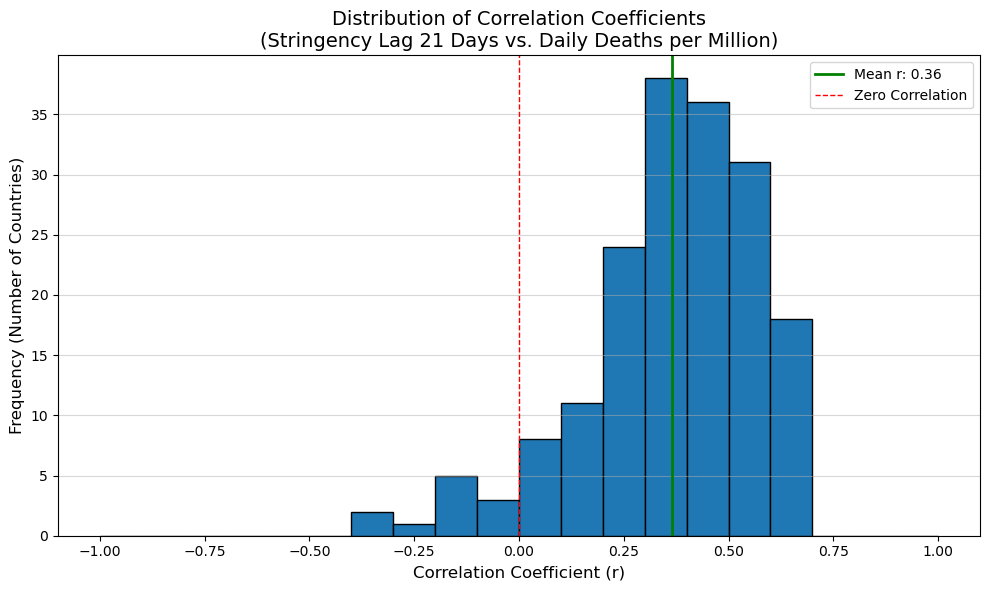

In [25]:
# --- Plot Histogram ---
plt.figure(figsize=(10, 6))
correlation_column = f'Correlation_Lag_{LAG_DAYS}_Days'
plt.hist(correlation_df[correlation_column], bins=20, range=(-1, 1), edgecolor='black', color='#1f77b4') 

plt.title(f'Distribution of Correlation Coefficients\n(Stringency Lag {LAG_DAYS} Days vs. Daily Deaths per Million)', fontsize=14)
plt.xlabel('Correlation Coefficient (r)', fontsize=12)
plt.ylabel('Frequency (Number of Countries)', fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Add mean line
mean_r = correlation_df[correlation_column].mean()
plt.axvline(x=mean_r, color='g', linestyle='-', linewidth=2, label=f'Mean r: {mean_r:.2f}')
plt.axvline(x=0, color='r', linestyle='--', linewidth=1, label='Zero Correlation')

plt.legend()
plt.tight_layout()
plt.savefig('correlation_histogram.png')